### Core Prediction Question
*Develop a predictive model to estimate the water quality indices of rivers and lakes based on parameters like pH, turbidity, dissolved oxygen, and contaminant levels.*

Authors: Nidhi Nayak, Vishali Kirthi Vallioor
ENERES 131 Final Project

In [7]:
# Imports and installs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading in our DataFrame

In [8]:
activity_df = pd.read_csv("activityall.csv")
activity_df.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,SampleContainerColorName,ChemicalPreservativeUsedName,ThermalPreservativeUsedName,SampleTransportStorageDescription,BinaryObjectFileName,BinaryObjectFileTypeCode,ActivityFileUrl,ActivityMetricUrl,ActivityGroupUrl,ProviderName
0,USGS-CA,USGS California Water Science Center,nwisca.01.02204018,Sample-Routine,Water,Surface Water,2022-05-25,09:17:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,nwisca.01.02305306,Sample-Routine,Water,Surface Water,2023-07-19,13:30:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,nwisca.01.02101851,Sample-Routine,Water,Surface Water,2021-01-28,13:13:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,nwisca.01.02100883,Sample-Routine,Sediment,Bottom material,2020-12-17,11:48:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,nwisca.01.02200902,Sample-Routine,Water,Surface Water,2021-12-14,16:29:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


In [26]:
biological_df = pd.read_csv("biologicalresult.csv")
biological_df.head()

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_29544/1408694812.py:1: DtypeWarning: Columns (12,14,20,23,32,33,54,57,58,60,73,76,78,80,83,84,94) have mixed types. Specify dtype option on import or set low_memory=False.
  biological_df = pd.read_csv("biologicalresult.csv")


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,LabSamplePreparationMethod/MethodQualifierTypeName,LabSamplePreparationMethod/MethodDescriptionText,PreparationStartDate,PreparationStartTime/Time,PreparationStartTime/TimeZoneCode,PreparationEndDate,PreparationEndTime/Time,PreparationEndTime/TimeZoneCode,SubstitutionDilutionFactorNumeric,ProviderName
0,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2580643,Sample-Routine,Water,NaN,2020-03-23,12:03:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2623870,Sample-Routine,Water,NaN,2020-09-08,08:57:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2637375,Sample-Routine,Water,NaN,2020-11-02,10:45:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2595931,Sample-Routine,Water,NaN,2020-05-27,13:05:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2631509,Sample-Routine,Water,NaN,2020-10-05,10:38:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


# DATA PRE-processing

EDA

In [9]:
activity_df.columns

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'ActivityTypeCode', 'ActivityMediaName',
       'ActivityMediaSubdivisionName', 'ActivityStartDate',
       'ActivityStartTime/Time', 'ActivityStartTime/TimeZoneCode',
       'ActivityEndDate', 'ActivityEndTime/Time',
       'ActivityEndTime/TimeZoneCode', 'ActivityRelativeDepthName',
       'ActivityDepthHeightMeasure/MeasureValue',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityDepthAltitudeReferencePointText',
       'ActivityTopDepthHeightMeasure/MeasureValue',
       'ActivityTopDepthHeightMeasure/MeasureUnitCode',
       'ActivityBottomDepthHeightMeasure/MeasureValue',
       'ActivityBottomDepthHeightMeasure/MeasureUnitCode', 'ProjectIdentifier',
       'ActivityConductingOrganizationText', 'MonitoringLocationIdentifier',
       'ActivityCommentText', 'SampleAquifer', 'HydrologicCondition',
       'HydrologicEvent', 'ActivityLocation/LatitudeMeasure',
       'ActivityLoc

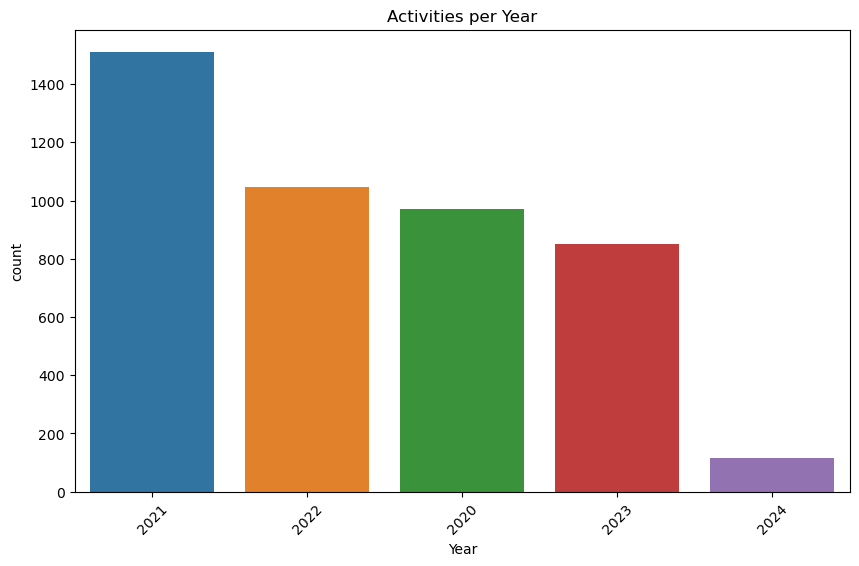

In [10]:
activity_df['ActivityStartDate'] = pd.to_datetime(activity_df['ActivityStartDate'])
activity_df['ActivityEndDate'] = pd.to_datetime(activity_df['ActivityEndDate'])

# Extract year and month for analysis
activity_df['Year'] = activity_df['ActivityStartDate'].dt.year
activity_df['Month'] = activity_df['ActivityStartDate'].dt.month

# Activities per year
plt.figure(figsize=(10, 6))
sns.countplot(data=activity_df, x='Year', order=activity_df['Year'].value_counts().index)
plt.title("Activities per Year")
plt.xticks(rotation=45)
plt.show()

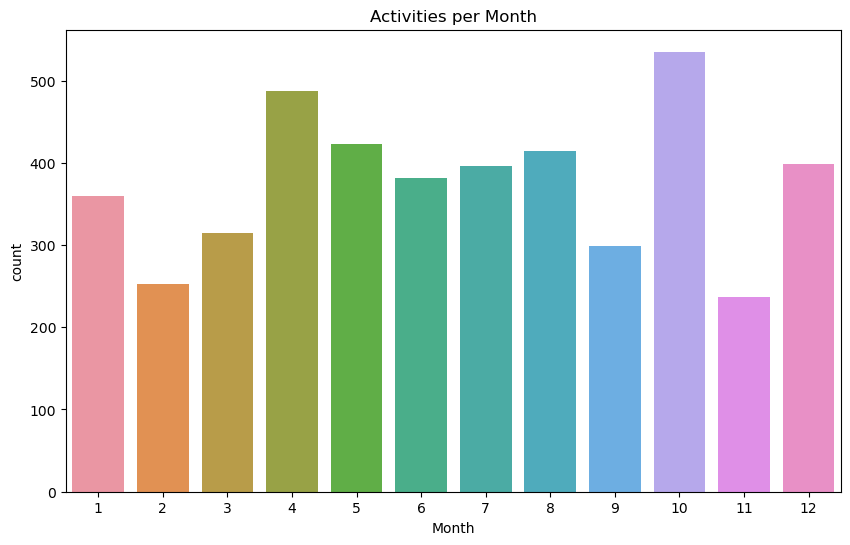

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=activity_df, x='Month', order=range(1, 13))
plt.title("Activities per Month")
plt.show()

In [13]:
!pip install geopandas

In [17]:
import geopandas as gpd
from shapely.geometry import Point

In [15]:
counties = gpd.read_file("ca_counties")

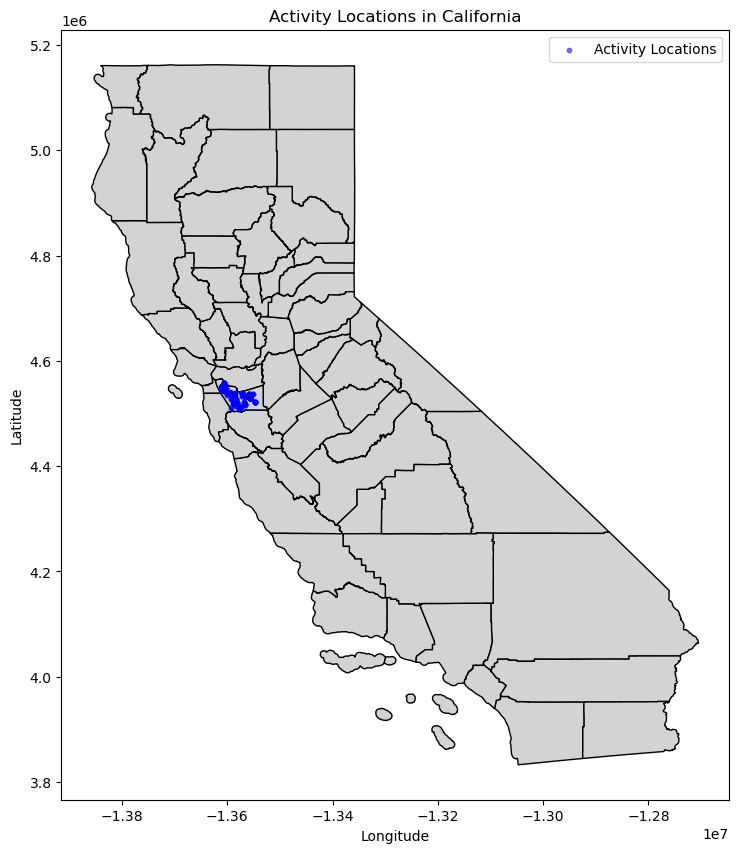

In [ ]:
activity_df = activity_df.dropna(subset=['ActivityLocation/LatitudeMeasure', 'ActivityLocation/LongitudeMeasure'])

geometry = [Point(xy) for xy in zip(activity_df['ActivityLocation/LongitudeMeasure'],
                                    activity_df['ActivityLocation/LatitudeMeasure'])]

activity_gdf = gpd.GeoDataFrame(activity_df, geometry=geometry)

activity_gdf.set_crs(epsg=4326, inplace=True)

activity_gdf = activity_gdf.to_crs(counties.crs)

fig, ax = plt.subplots(figsize=(10, 10))
counties.plot(ax=ax, color='lightgray', edgecolor='black')
activity_gdf.plot(ax=ax, markersize=10, color='blue', alpha=0.5, label='Activity Locations')
plt.title('Activity Locations in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

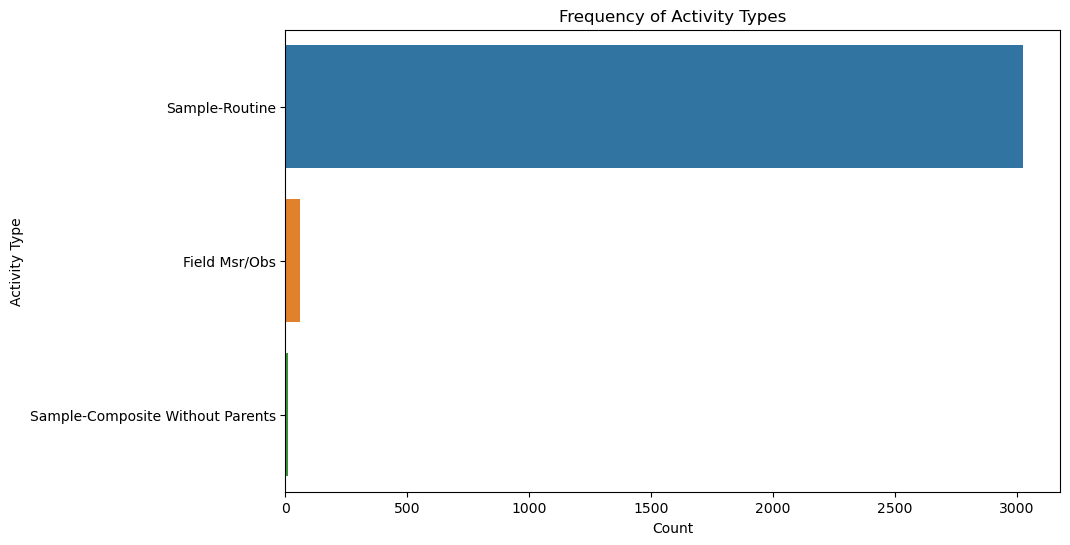

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=activity_df, y='ActivityTypeCode', order=activity_df['ActivityTypeCode'].value_counts().index)
plt.title("Frequency of Activity Types")
plt.xlabel("Count")
plt.ylabel("Activity Type")
plt.show()

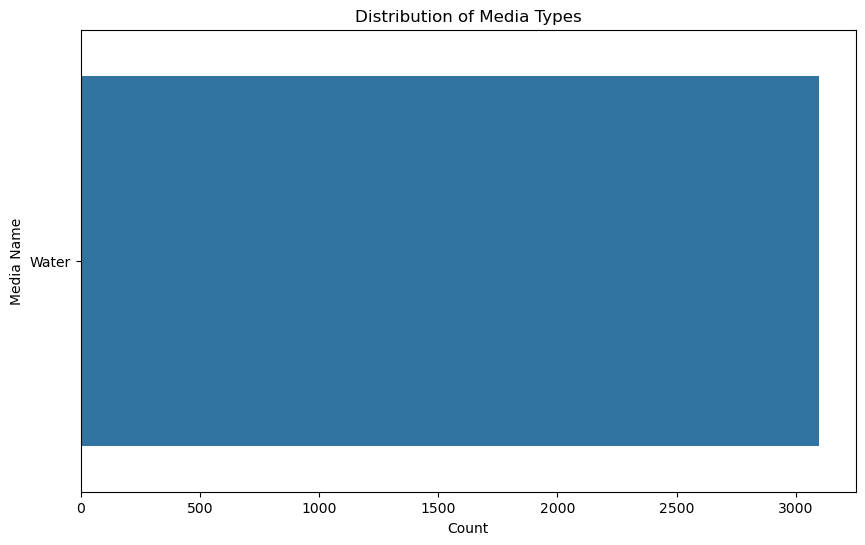

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=activity_df, y='ActivityMediaName', order=activity_df['ActivityMediaName'].value_counts().index)
plt.title("Distribution of Media Types")
plt.xlabel("Count")
plt.ylabel("Media Name")
plt.show()

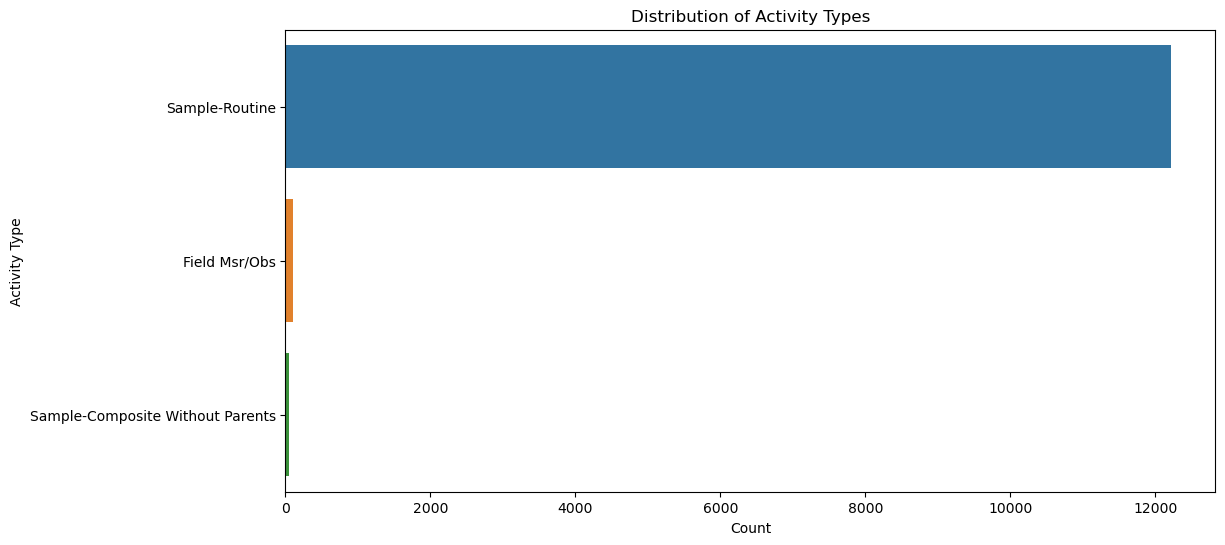

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=biological_df, y='ActivityTypeCode', order=biological_df['ActivityTypeCode'].value_counts().index)
plt.title("Distribution of Activity Types")
plt.xlabel("Count")
plt.ylabel("Activity Type")
plt.show()

/Users/vishalivallioor/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vishalivallioor/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


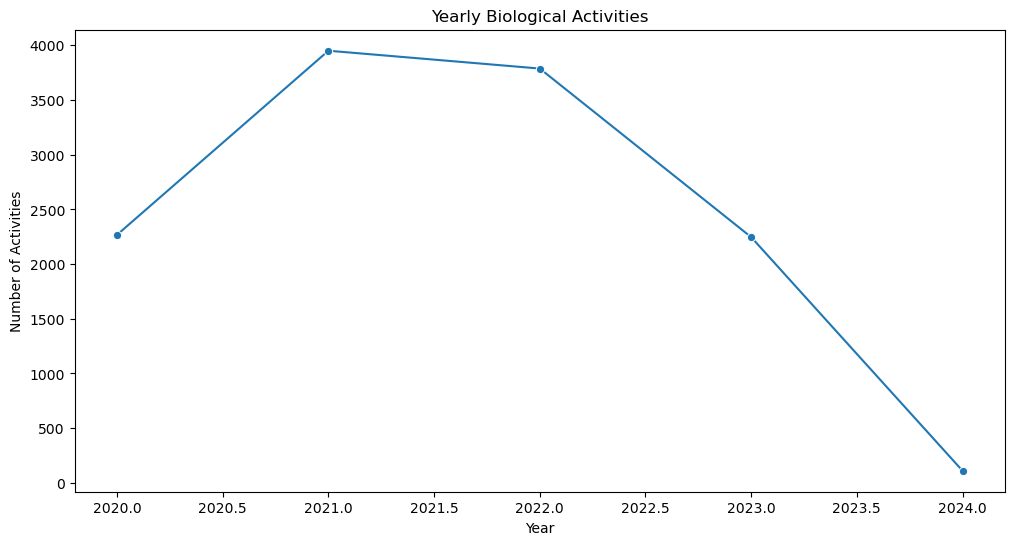

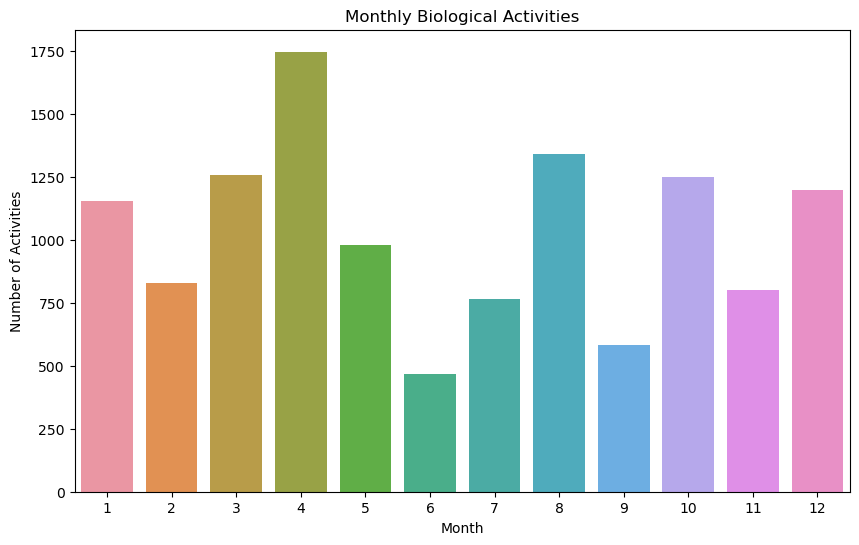

In [29]:
# Convert date columns to datetime
biological_df['ActivityStartDate'] = pd.to_datetime(biological_df['ActivityStartDate'])

# Activities by Year
biological_df['Year'] = biological_df['ActivityStartDate'].dt.year
yearly_counts = biological_df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Yearly Biological Activities")
plt.xlabel("Year")
plt.ylabel("Number of Activities")
plt.show()

# Activities by Month
biological_df['Month'] = biological_df['ActivityStartDate'].dt.month
monthly_counts = biological_df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Monthly Biological Activities")
plt.xlabel("Month")
plt.ylabel("Number of Activities")
plt.show()


In [42]:
biological_df["CharacteristicName"].unique()

array(['Fecal Coliform', 'Total Coliform', 'Enterococcus', 'Turbidity',
       'Dissolved oxygen (DO)', 'Organic carbon', 'Conductivity',
       'Nitrate', 'Zinc', 'Alkalinity, total', 'Ammonia',
       'Moisture content', 'pH', 'Kjeldahl nitrogen', 'Survival',
       'Phosphorus', 'Tributyl phosphate', 'Chloride',
       'Triphenyl phosphate', 'Selenium', 'Nitrite', 'Nitrobenzene-D5',
       'Nickel',
       'Inorganic nitrogen (nitrate and nitrite) ***retired***use Nitrate + Nitrite',
       'p-Terphenyl-d14', 'Arsenic', 'Sand', 'Depth, Secchi disk depth',
       'Tetrachloro-m-xylene', 'Copper', '.lambda.-Cyhalothrin',
       'Bifenthrin', 'Total suspended solids', 'Boron', 'Silt',
       'Molybdenum', '2-Fluorobiphenyl', 'Decachlorobiphenyl',
       'Total Nitrogen, mixed forms', 'Depth, bottom', 'Chloroxuron',
       'Total Phosphorus, mixed forms', 'True color', 'Nitrate + Nitrite',
       'Temperature, water',
       'Weather condition (WMO code 4501) (choice list)', 'Chlorophyl

In [45]:
biological_df[biological_df["CharacteristicName"] == 'Organic carbon']

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,PreparationStartDate,PreparationStartTime/Time,PreparationStartTime/TimeZoneCode,PreparationEndDate,PreparationEndTime/Time,PreparationEndTime/TimeZoneCode,SubstitutionDilutionFactorNumeric,ProviderName,Year,Month
16,CEDEN,California State Water Resources Control Board,CEDEN--2144303863,Sample-Routine,Water,NaN,2020-06-09,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2020,6
95,CEDEN,California State Water Resources Control Board,CEDEN--2144307217,Sample-Routine,Water,NaN,2020-09-08,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2020,9
556,CEDEN,California State Water Resources Control Board,CEDEN--2144305207,Sample-Routine,Water,NaN,2020-04-14,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2020,4
730,CEDEN,California State Water Resources Control Board,CEDEN--2144308595,Sample-Routine,Water,NaN,2020-04-14,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2020,4
885,CEDEN,California State Water Resources Control Board,CEDEN--2144085527,Sample-Routine,Water,NaN,2021-06-08,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,6
886,CEDEN,California State Water Resources Control Board,CEDEN--2144306921,Sample-Routine,Water,NaN,2021-01-29,08:30:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,1
964,CEDEN,California State Water Resources Control Board,CEDEN--2144059167,Sample-Routine,Water,NaN,2021-09-14,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,9
967,CEDEN,California State Water Resources Control Board,CEDEN--2144087330,Sample-Routine,Water,NaN,2021-10-12,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,10
975,CEDEN,California State Water Resources Control Board,CEDEN--2144080877,Sample-Routine,Water,NaN,2021-04-13,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,4
1002,CEDEN,California State Water Resources Control Board,CEDEN--2144071654,Sample-Routine,Water,NaN,2021-10-12,08:00:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,10


In [47]:
station_df = pd.read_csv("Station.csv")
station_df.head()

,Org_Identifier,Org_FormalName,ProviderName,Location_Identifier,Location_Name,Location_Type,Location_Description,Location_State,Location_CountryName,Location_CountyName,...,Location_DrainageAreaMeasure,Location_DrainageAreaMeasureUnit,Location_ContributingDrainageAreaMeasure,Location_ContributingDrainageAreaMeasureUnit,AlternateLocation_IdentifierA,AlternateLocation_IdentifierContextA,AlternateLocation_IdentifierB,AlternateLocation_IdentifierContextB,AlternateLocation_IdentifierC,AlternateLocation_IdentifierContextC


In [ ]:
water_df = activity_df[activity_df["ActivityMediaName"] == "Water"]

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,ThermalPreservativeUsedName,SampleTransportStorageDescription,BinaryObjectFileName,BinaryObjectFileTypeCode,ActivityFileUrl,ActivityMetricUrl,ActivityGroupUrl,ProviderName,Year,Month
1402,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2738811,Sample-Routine,Water,NaN,2021-12-06,13:11:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,12
1403,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2867215,Sample-Routine,Water,NaN,2023-08-07,08:45:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2023,8
1404,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2770410,Sample-Routine,Water,NaN,2022-05-02,13:45:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2022,5
1405,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2849177,Sample-Routine,Water,NaN,2023-05-30,09:27:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2023,5
1406,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2730170,Sample-Routine,Water,NaN,2021-10-25,12:04:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2796251,Sample-Routine,Water,NaN,2022-10-11,11:50:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2022,10
4493,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2870817,Sample-Routine,Water,NaN,2023-08-28,11:15:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2023,8
4494,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2857325,Sample-Routine,Water,NaN,2023-07-10,09:30:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2023,7
4495,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2637377,Sample-Routine,Water,NaN,2020-11-02,10:31:00,PST,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,2020,11


In [60]:
result_df = pd.read_csv("data/narrowresult.csv")
result_df

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_29544/2783472390.py:1: DtypeWarning: Columns (10,13,15,20,21,71) have mixed types. Specify dtype option on import or set low_memory=False.
  result_df = pd.read_csv("data/narrowresult.csv")


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
0,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2580643,2020-03-23,12:03:00,PST,CABEACH_WQX-Crown 2001 Shoreline Dr.,STORET-899660775,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2623870,2020-09-08,08:57:00,PST,CABEACH_WQX-Crown Sunset Rd.,STORET-899665009,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2637375,2020-11-02,10:45:00,PST,CABEACH_WQX-Crown 2001 Shoreline Dr.,STORET-899660950,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2595931,2020-05-27,13:05:00,PST,CABEACH_WQX-Crown Bird Sanctuary,STORET-899664813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2631509,2020-10-05,10:38:00,PST,CABEACH_WQX-Crown Bird Sanctuary,STORET-899664722,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,USGS-CA,USGS California Water Science Center,nwisca.01.02302269,2023-02-15,10:00:00,PST,USGS-373642122120401,NWIS-125192432,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
10154,USGS-CA,USGS California Water Science Center,nwisca.01.02302269,2023-02-15,10:00:00,PST,USGS-373642122120401,NWIS-125192434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
10155,USGS-CA,USGS California Water Science Center,nwisca.01.02302269,2023-02-15,10:00:00,PST,USGS-373642122120401,NWIS-125192437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
10156,USGS-CA,USGS California Water Science Center,nwisca.01.02302269,2023-02-15,10:00:00,PST,USGS-373642122120401,NWIS-125192438,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


In [77]:
str(result_df["CharacteristicName"].unique())

"['Fecal Coliform' 'Total Coliform' 'Enterococcus' 'Turbidity'\n 'Dissolved oxygen (DO)' 'Organic carbon' 'Conductivity' 'Nitrate' 'Zinc'\n 'Alkalinity, total' 'Ammonia' 'Moisture content' 'pH' 'Kjeldahl nitrogen'\n 'Survival' 'Phosphorus' 'Tributyl phosphate' 'Chloride'\n 'Triphenyl phosphate' 'Selenium' 'Nitrite' 'Nitrobenzene-D5' 'Nickel'\n 'Inorganic nitrogen (nitrate and nitrite) ***retired***use Nitrate + Nitrite'\n 'p-Terphenyl-d14' 'Arsenic' 'Sand' 'Depth, Secchi disk depth'\n 'Tetrachloro-m-xylene' 'Copper' '.lambda.-Cyhalothrin' 'Bifenthrin'\n 'Total suspended solids' 'Boron' 'Silt' 'Molybdenum' '2-Fluorobiphenyl'\n 'Decachlorobiphenyl' 'Total Nitrogen, mixed forms' 'Depth, bottom'\n 'Chloroxuron' 'Total Phosphorus, mixed forms' 'True color'\n 'Nitrate + Nitrite' 'Temperature, water'\n 'Weather condition (WMO code 4501) (choice list)' 'Chlorophyll a' 'Lead'\n 'Tebuthiuron' 'Temperature, air' 'Cloud cover'\n 'Wind Speed Severity (choice list)' 'Precipitation'\n 'Precipitation 

In [73]:
result_df[result_df['CharacteristicName'] == 'True color']

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
936,NARS_WQX,EPA National Aquatic Resources Survey (NARS),NARS_WQX-182400_2021,2021-05-06,NaN,NaN,NARS_WQX-NWC_CA-10331,STORET-1040682588,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
979,NARS_WQX,EPA National Aquatic Resources Survey (NARS),NARS_WQX-185400_2021,2021-07-26,NaN,NaN,NARS_WQX-NWC_CA-10279,STORET-1040686797,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
1067,NARS_WQX,EPA National Aquatic Resources Survey (NARS),NARS_WQX-187910_2021,2021-09-03,NaN,NaN,NARS_WQX-NWC_CA-10352,STORET-1040689649,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
